In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from src.datasets_generator import DatasetsGenerator
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import PredefinedSplit, GridSearchCV

## 1. Generate Synthetic Data

In [2]:
indep_df, dep_df = DatasetsGenerator.get_generic_regression_dataset(only_continuous_indep=True)

In [4]:
indep_df.head(3)

,X_1,X_2,X_3,X_4,X_5
0,-0.660707,-2.165475,-0.966875,-0.496182,-1.439579
1,-1.488974,0.343890,0.566556,-1.047448,1.306438
2,-1.086959,-1.010035,0.421872,-0.201817,1.787369


In [5]:
dep_df.head(3)

,Y_1
0,0.172519
1,1.635483
2,0.037336


## 2. Define Custom Split for Futher Use in Cross-Validation

In [9]:
sample_split = PredefinedSplit(test_fold=[0] * 1500 + [-1] * 500)
sample_split

PredefinedSplit(test_fold=array([ 0,  0, ..., -1, -1]))

## 3. Define Custom Grid of Decisiont Tree Hypterparameters to Iterate Over in the Grid Search

In [10]:
dt_param_grid = {
    "max_depth": [2, 3, 5],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [2, 5, 10]
}

## 4. Create GridSearchCV Instance and Run It on the Data

Create grid search instance - put the components prepared above together:
1. use the mean absolute error as the scoring function
2. use user-defined sample split (cf. above: first 1500 obs are the train set, other 500: test set)
3. use the dictionary of hyperparameters defined above

NOTE: negative of the mean absolute error is passed as the scoring function since the model selection is based on the HIGHEST value od the score

In [13]:
# create an instance 
gs_cv = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=dt_param_grid,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    cv=sample_split,
    n_jobs=5
)

In [15]:
# run the grid search
gs_cv.fit(X=indep_df, y=dep_df)

GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0,  0, ..., -1, -1])),
             estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error')

### 5. Review the Results of the Grid Search

Let's start by viewing all the models that have been fitted.

In [22]:
cv_results_df = pd.DataFrame(data=gs_cv.cv_results_)
cv_results_df = cv_results_df.sort_values("rank_test_score").reset_index(drop=False)
cv_results_df.loc[:, "params":]

,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
0,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",-0.844889,-0.844889,0.0,1,-0.759277,-0.759277,0.0
1,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",-0.844889,-0.844889,0.0,1,-0.759277,-0.759277,0.0
2,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",-0.844889,-0.844889,0.0,1,-0.759277,-0.759277,0.0
3,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",-0.844889,-0.844889,0.0,1,-0.759277,-0.759277,0.0
4,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",-0.847655,-0.847655,0.0,5,-0.759770,-0.759770,0.0
5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",-0.847655,-0.847655,0.0,5,-0.759770,-0.759770,0.0
6,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",-0.847655,-0.847655,0.0,5,-0.759770,-0.759770,0.0
7,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",-0.847655,-0.847655,0.0,5,-0.759770,-0.759770,0.0
8,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",-0.847938,-0.847938,0.0,9,-0.758347,-0.758347,0.0
9,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",-0.847938,-0.847938,0.0,9,-0.758347,-0.758347,0.0


Next, let's inspect the best models found by the grid search...

In [21]:
best_tree = gs_cv.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)

In [27]:
gs_cv.best_params_

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [23]:
cv_results_df.loc[0, :]

index                                                                      8
mean_fit_time                                                       0.001348
std_fit_time                                                             0.0
mean_score_time                                                     0.000762
std_score_time                                                           0.0
param_max_depth                                                            2
param_min_samples_leaf                                                    10
param_min_samples_split                                                    2
params                     {'max_depth': 2, 'min_samples_leaf': 10, 'min_...
split0_test_score                                                  -0.844889
mean_test_score                                                    -0.844889
std_test_score                                                           0.0
rank_test_score                                                            1

Print the best tree:

[Text(0.5, 0.8333333333333334, 'x[0] <= 2.316\nsquared_error = 1.031\nsamples = 2000\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[3] <= 0.554\nsquared_error = 1.027\nsamples = 1979\nvalue = 0.006'),
 Text(0.125, 0.16666666666666666, 'squared_error = 1.046\nsamples = 1435\nvalue = 0.041'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.966\nsamples = 544\nvalue = -0.088'),
 Text(0.75, 0.5, 'x[3] <= -0.384\nsquared_error = 1.104\nsamples = 21\nvalue = -0.552'),
 Text(0.625, 0.16666666666666666, 'squared_error = 1.509\nsamples = 11\nvalue = -0.226'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.414\nsamples = 10\nvalue = -0.91')]

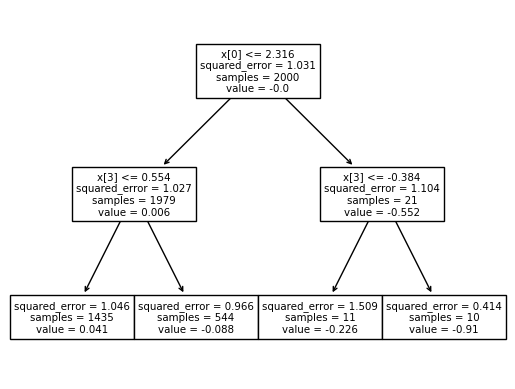

In [29]:
plot_tree(best_tree)